In [1]:
!pip install -U insightface

import torch
if torch.cuda.is_available():
  print('gpu is available')
  !pip install onnxruntime-gpu==1.9.0  # to use GPU
else:
  print('gpu is not available')
  !pip install onnxruntime

gpu is not available
     |████████████████████████████████| 4.9 MB 1.3 MB/s eta 0:00:01     |██▏                             | 327 kB 202 kB/s eta 0:00:23     |███████████████████████████▊    | 4.2 MB 1.3 MB/s eta 0:00:01     |█████████████████████████████   | 4.5 MB 1.3 MB/s eta 0:00:01


In [2]:
!mkdir datasets
!wget https://github.com/mehrdaddjavdi/Face-recognition/tree/master/sample_lfw_images -P datasets
!unzip "./datasets/sample_lfw_images.zip" -d './datasets/sample_lfw_images'

--2022-01-25 09:08:19--  https://github.com/hamidsadeghi68/face-clustering/raw/main/sample_images/sample_lfw_images.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/sample_lfw_images.zip [following]
--2022-01-25 09:08:20--  https://raw.githubusercontent.com/hamidsadeghi68/face-clustering/main/sample_images/sample_lfw_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 351314 (343K) [application/zip]
Saving to: ‘datasets/sample_lfw_images.zip’

sample_lfw_images.z 100%[===================>] 343.08K  18.4KB/s    in 67s     

2022-01-25 09

In [3]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

app = FaceAnalysis()
app.prepare(ctx_id=0, det_thresh=0.5)

Matplotlib is building the font cache; this may take a moment.


download_path: /home/kali/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [03:58<00:00, 1179.38KB/s]


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/kali/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/kali/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/kali/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/kali/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /home/kali/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size

In [4]:
import os
import cv2
import numpy as np

dataset_path = './datasets/sample_lfw_images'
files = os.listdir(dataset_path)

accepted_files = []
features = []
counter = 1
for file in files:
  if not file.endswith('.jpg'):
    continue
  print('prosessing image %d: %s'%(counter,file))
  
  img = cv2.imread(os.path.join(dataset_path, file))
  faces = app.get(img)
  features.append(faces[0].normed_embedding)

  accepted_files.append(file)
  
  counter+=1

prosessing image 1: 06.jpg
prosessing image 2: 11.jpg
prosessing image 3: 08.jpg
prosessing image 4: 25.jpg
prosessing image 5: 05.jpg
prosessing image 6: 24.jpg
prosessing image 7: 21.jpg
prosessing image 8: 02.jpg
prosessing image 9: 01.jpg
prosessing image 10: 12.jpg
prosessing image 11: 22.jpg
prosessing image 12: 20.jpg
prosessing image 13: 07.jpg
prosessing image 14: 23.jpg
prosessing image 15: 09.jpg
prosessing image 16: 04.jpg
prosessing image 17: 17.jpg
prosessing image 18: 14.jpg
prosessing image 19: 13.jpg
prosessing image 20: 10.jpg
prosessing image 21: 03.jpg
prosessing image 22: 16.jpg
prosessing image 23: 19.jpg
prosessing image 24: 18.jpg
prosessing image 25: 15.jpg


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_clustering_result(y_prediction, data_path, file_names):
  figsize = 2

  num_of_clusters = max(y_prediction)+1
  for cluster_id in range(num_of_clusters):
    indeces = y_prediction==cluster_id
    num_of_images = sum(indeces)
    
    plt.figure(figsize=(figsize*num_of_images, figsize))

    c = 1
    for i, file_name in enumerate(file_names):
      if indeces[i]:
        plt.subplot(1, num_of_images, c)
        img = mpimg.imread(os.path.join(data_path, file_name))
        plt.imshow(img)
        c+=1
  
  # noise images
  noise_indecs = np.where(y_prediction == -1)
  for i in noise_indecs[0]:
    plt.figure(figsize=(figsize, figsize))
    img = mpimg.imread(os.path.join(data_path, file_names[i]))
    plt.imshow(img)

[ 1  8  0 10  1  9  3  4  4  7  3  6  0  3  0  1  2  5  7  8  1  2  6  2
  5]


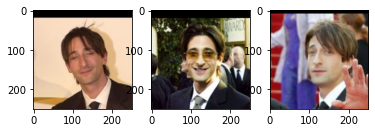

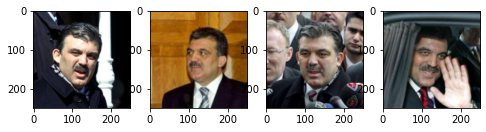

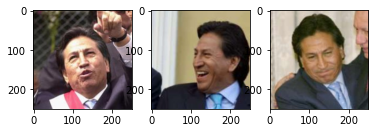

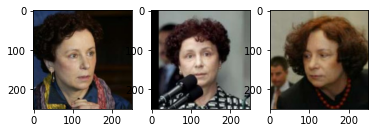

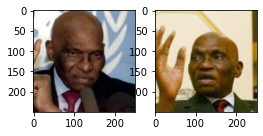

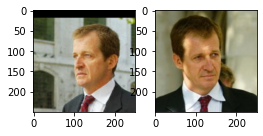

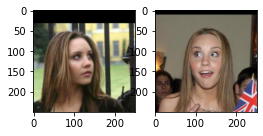

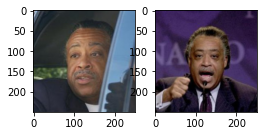

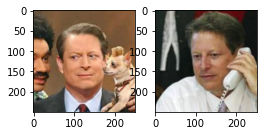

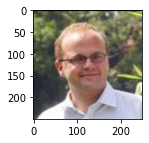

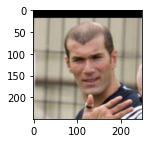

In [11]:


from sklearn import cluster
k = 11 # the number of clusters
y_pred = cluster.KMeans(n_clusters=k, random_state=0).fit_predict(features)
print(y_pred)
show_clustering_result(y_pred, dataset_path, accepted_files)



[ 0  1  2 -1  0 -1  3  4  4  5  3  6  2  3  2  0  7  8  5  1  0  7  6  7
  8]


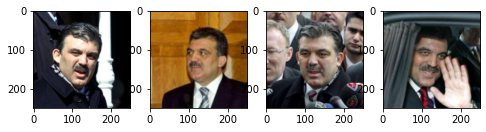

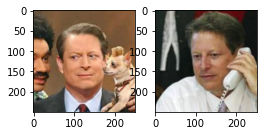

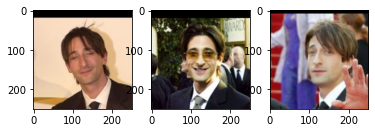

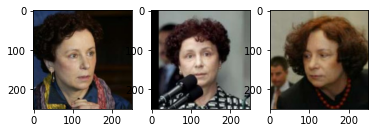

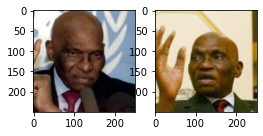

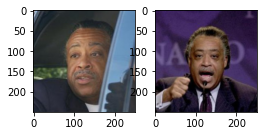

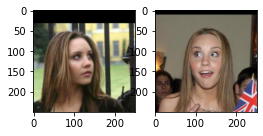

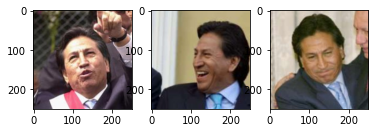

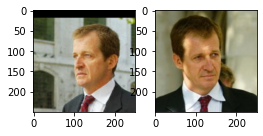

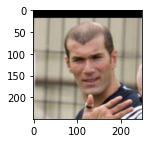

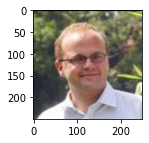

In [10]:
y_pred = cluster.DBSCAN(eps=1, min_samples=2).fit_predict(features)
print(y_pred)
show_clustering_result(y_pred, dataset_path, accepted_files)

[ 3  0 10  8  3  6  2  7  7  4  2  1 10  2 10  3  5  9  4  0  3  5  1  5
  9]


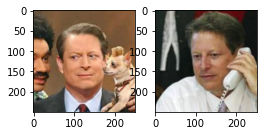

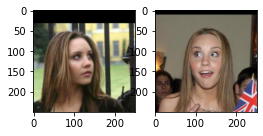

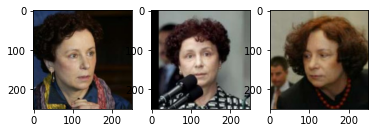

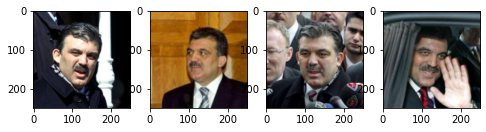

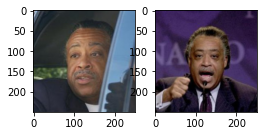

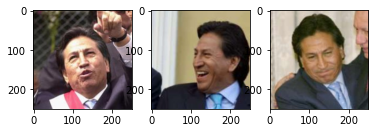

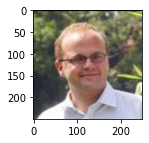

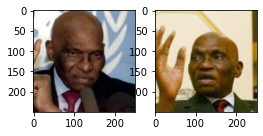

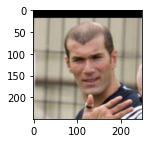

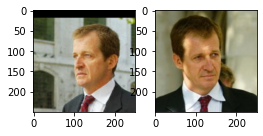

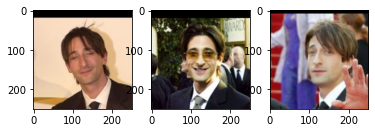

In [12]:
y_pred = cluster.AgglomerativeClustering(n_clusters=None, distance_threshold=1, linkage='single').fit_predict(features)
print(y_pred)
show_clustering_result(y_pred, dataset_path, accepted_files)